In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import SGD

In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values



Number of rows and columns: (1259, 7)


In [21]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
print(len(X_train))
# print(X_train)
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

740
(740, 60)


In [5]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 9s 17ms/step - loss: 0.0603
Epoch 2/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0154
Epoch 3/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0127
Epoch 4/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0141
Epoch 5/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0125
Epoch 6/25
24/24 [==============================] - 0s 14ms/step - loss: 0.0116
Epoch 7/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0119
Epoch 8/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0128
Epoch 9/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 10/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0102
Epoch 11/25
24/24 [==============================] - 0s 13ms/step - loss: 0.0088
Epoch 12/25
24/24 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 13/25
24/24 [==================

In [6]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [7]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

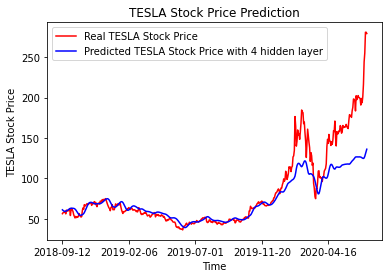

In [118]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 hidden layer')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [97]:
model_2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))
# Adding a feiveth LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))
# Adding a seventh LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))
# Adding a eighth LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50))
model_2.add(Dropout(0.2))
# Adding the output layer
model_2.add(Dense(units = 1))

# Compiling the RNN
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_2.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 15s 31ms/step - loss: 0.0928
Epoch 2/25
24/24 [==============================] - 1s 31ms/step - loss: 0.0252
Epoch 3/25
24/24 [==============================] - 1s 34ms/step - loss: 0.0200
Epoch 4/25
24/24 [==============================] - 1s 30ms/step - loss: 0.0175
Epoch 5/25
24/24 [==============================] - 1s 31ms/step - loss: 0.0172
Epoch 6/25
24/24 [==============================] - 1s 30ms/step - loss: 0.0190
Epoch 7/25
24/24 [==============================] - 1s 30ms/step - loss: 0.0170
Epoch 8/25
24/24 [==============================] - 1s 31ms/step - loss: 0.0165
Epoch 9/25
24/24 [==============================] - 1s 30ms/step - loss: 0.0152
Epoch 10/25
24/24 [==============================] - 1s 30ms/step - loss: 0.0151
Epoch 11/25
24/24 [==============================] - 1s 31ms/step - loss: 0.0121
Epoch 12/25
24/24 [==============================] - 1s 31ms/step - loss: 0.0120
Epoch 13/25
24/24 [=================

In [98]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [99]:
predicted_stock_price_2 = model.predict(X_test)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

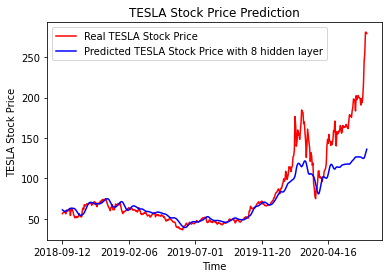

In [100]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_2, color = 'blue', label = 'Predicted TESLA Stock Price with 8 hidden layer')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **Six hidden layer**

In [15]:
model_3 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_3.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))
# Adding a fiveth LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50))
model_3.add(Dropout(0.2))
# Adding the output layer
model_3.add(Dense(units = 1))

# Compiling the RNN
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_3.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 11s 24ms/step - loss: 0.0837
Epoch 2/25
24/24 [==============================] - 1s 23ms/step - loss: 0.0239
Epoch 3/25
24/24 [==============================] - 1s 22ms/step - loss: 0.0190
Epoch 4/25
24/24 [==============================] - 1s 23ms/step - loss: 0.0149
Epoch 5/25
24/24 [==============================] - 1s 23ms/step - loss: 0.0168
Epoch 6/25
24/24 [==============================] - 1s 23ms/step - loss: 0.0160
Epoch 7/25
24/24 [==============================] - 1s 23ms/step - loss: 0.0151
Epoch 8/25
24/24 [==============================] - 1s 23ms/step - loss: 0.0171
Epoch 9/25
24/24 [==============================] - 1s 22ms/step - loss: 0.0155
Epoch 10/25
24/24 [==============================] - 1s 22ms/step - loss: 0.0122
Epoch 11/25
24/24 [==============================] - 1s 22ms/step - loss: 0.0131
Epoch 12/25
24/24 [==============================] - 1s 23ms/step - loss: 0.0124
Epoch 13/25
24/24 [=================

In [16]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [17]:
predicted_stock_price_3 = model.predict(X_test)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)

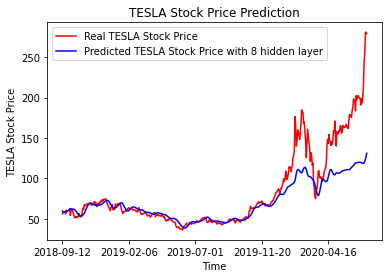

In [18]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_3, color = 'blue', label = 'Predicted TESLA Stock Price with 6 hidden layer')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **Droup rate is 0.3**

In [102]:
model_4 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_4.add(Dropout(0.3))
# Adding a second LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 50, return_sequences = True))
model_4.add(Dropout(0.3))
# Adding a third LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 50, return_sequences = True))
model_4.add(Dropout(0.3))
# Adding a fourth LSTM layer and some Dropout regularisation
model_4.add(LSTM(units = 50))
model_4.add(Dropout(0.3))
# Adding the output layer
model_4.add(Dense(units = 1))

# Compiling the RNN
model_4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_4.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 7s 17ms/step - loss: 0.0770
Epoch 2/25
24/24 [==============================] - 0s 16ms/step - loss: 0.0197
Epoch 3/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0165
Epoch 4/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0159
Epoch 5/25
24/24 [==============================] - 0s 16ms/step - loss: 0.0139
Epoch 6/25
24/24 [==============================] - 0s 16ms/step - loss: 0.0140
Epoch 7/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0127
Epoch 8/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0124
Epoch 9/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0127
Epoch 10/25
24/24 [==============================] - 0s 16ms/step - loss: 0.0126
Epoch 11/25
24/24 [==============================] - 0s 16ms/step - loss: 0.0123
Epoch 12/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0106
Epoch 13/25
24/24 [==================

In [103]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [104]:
predicted_stock_price_4 = model.predict(X_test)
predicted_stock_price_4 = sc.inverse_transform(predicted_stock_price_4)

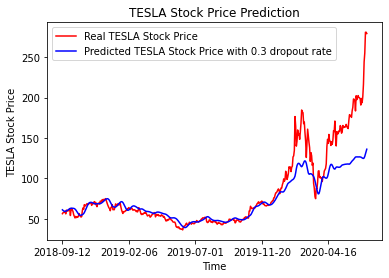

In [105]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_4, color = 'blue', label = 'Predicted TESLA Stock Price with 0.3 dropout rate')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **Droup rate is 0.4**

In [106]:
model_5 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_5.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_5.add(Dropout(0.4))
# Adding a second LSTM layer and some Dropout regularisation
model_5.add(LSTM(units = 50, return_sequences = True))
model_5.add(Dropout(0.4))
# Adding a third LSTM layer and some Dropout regularisation
model_5.add(LSTM(units = 50, return_sequences = True))
model_5.add(Dropout(0.4))
# Adding a fourth LSTM layer and some Dropout regularisation
model_5.add(LSTM(units = 50))
model_5.add(Dropout(0.4))
# Adding the output layer
model_5.add(Dense(units = 1))

# Compiling the RNN
model_5.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_5.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 7s 17ms/step - loss: 0.0571
Epoch 2/25
24/24 [==============================] - 0s 19ms/step - loss: 0.0216
Epoch 3/25
24/24 [==============================] - 0s 17ms/step - loss: 0.0187
Epoch 4/25
24/24 [==============================] - 0s 18ms/step - loss: 0.0188
Epoch 5/25
24/24 [==============================] - 0s 18ms/step - loss: 0.0186
Epoch 6/25
24/24 [==============================] - 0s 17ms/step - loss: 0.0165
Epoch 7/25
24/24 [==============================] - 0s 17ms/step - loss: 0.0156
Epoch 8/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0178
Epoch 9/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0139
Epoch 10/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0139
Epoch 11/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0148
Epoch 12/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0137
Epoch 13/25
24/24 [==================

In [ ]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

In [29]:
predicted_stock_price_5 = model.predict(X_test)
predicted_stock_price_5 = sc.inverse_transform(predicted_stock_price_5)

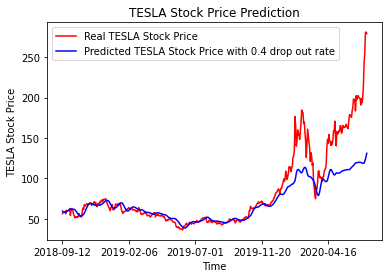

In [107]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_5, color = 'blue', label = 'Predicted TESLA Stock Price with 0.4 drop out rate')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **Change optimizer 改变优化器**

In [109]:
model_6 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_6.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_6.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_6.add(LSTM(units = 50, return_sequences = True))
model_6.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_6.add(LSTM(units = 50, return_sequences = True))
model_6.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_6.add(LSTM(units = 50))
model_6.add(Dropout(0.2))
# Adding the output layer
model_6.add(Dense(units = 1))

# Compiling the RNN
model_6.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_6.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
24/24 [==============================] - 7s 17ms/step - loss: 0.0482
Epoch 2/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0209
Epoch 3/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0225
Epoch 4/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0163
Epoch 5/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0193
Epoch 6/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0176
Epoch 7/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0148
Epoch 8/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0139
Epoch 9/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0127
Epoch 10/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0137
Epoch 11/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0110
Epoch 12/25
24/24 [==============================] - 0s 15ms/step - loss: 0.0113
Epoch 13/25
24/24 [==================

In [110]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [111]:
predicted_stock_price_6 = model.predict(X_test)
predicted_stock_price_6 = sc.inverse_transform(predicted_stock_price_6)

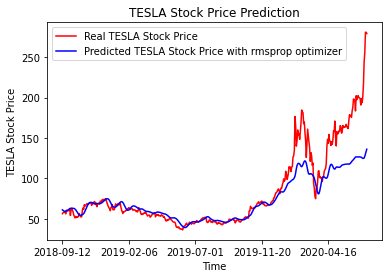

In [113]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_6, color = 'blue', label = 'Predicted TESLA Stock Price with rmsprop optimizer')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **Change time log into 7**

In [32]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train_2 = []
y_train_2 = []
for i in range(67, 800):
    X_train_2.append(training_set_scaled[i-60:i, 0])
    y_train_2.append(training_set_scaled[i, 0])
X_train_2, y_train_2 = np.array(X_train_2), np.array(y_train_2)
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 1))
#(740, 60, 1)

In [38]:
model_7 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_7.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_7.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_7.add(LSTM(units = 50, return_sequences = True))
model_7.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_7.add(LSTM(units = 50, return_sequences = True))
model_7.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_7.add(LSTM(units = 50))
model_7.add(Dropout(0.2))
# Adding the output layer
model_7.add(Dense(units = 1))

# Compiling the RNN
model_7.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_7.fit(X_train_2, y_train_2, epochs = 25, batch_size = 32)

Epoch 1/25
23/23 [==============================] - 7s 17ms/step - loss: 0.0632
Epoch 2/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0204
Epoch 3/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0134
Epoch 4/25
23/23 [==============================] - 0s 16ms/step - loss: 0.0131
Epoch 5/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0131
Epoch 6/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0126
Epoch 7/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0117
Epoch 8/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0113
Epoch 9/25
23/23 [==============================] - 0s 16ms/step - loss: 0.0104
Epoch 10/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0102
Epoch 11/25
23/23 [==============================] - 0s 16ms/step - loss: 0.0099
Epoch 12/25
23/23 [==============================] - 0s 15ms/step - loss: 0.0094
Epoch 13/25
23/23 [==================

In [85]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[807:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test_22 = []
for i in range(67, 519):
    X_test_22.append(inputs[i-67:i-7, 0])
X_test_22 = np.array(X_test_22)
X_test_22 = np.reshape(X_test_22, (X_test_22.shape[0], X_test_22.shape[1], 1))
print(X_test_22.shape[0])
print(X_test_22.shape)
print(dataset_test)
# (459, 60, 1)

452
(452, 60, 1)
            Open
807    59.540001
808    59.695999
809    60.000000
810    60.382000
811    62.580002
...          ...
1254  244.296005
1255  255.337997
1256  281.002014
1257  281.000000
1258  279.398010

[452 rows x 1 columns]


In [86]:
print(X_test_22.shape[0])

452


In [87]:
predicted_stock_price_7 = model.predict(X_test_22)
predicted_stock_price_7 = sc.inverse_transform(predicted_stock_price_7)
predicted_stock_price_7.shape
print(dataset_test.values.shape)

(452, 1)


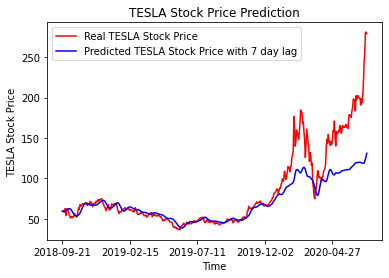

In [88]:
plt.plot(df.loc[807:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_7, color = 'blue', label = 'Predicted TESLA Stock Price with 7 day lag')
plt.xticks(np.arange(0,452,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Change time log into 14

In [33]:
from re import X
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train_3 = []
y_train_3 = []
for i in range(74, 800):
    X_train_3.append(training_set_scaled[i-60:i, 0])
    y_train_3.append(training_set_scaled[i, 0])
X_train_3, y_train_3 = np.array(X_train_3), np.array(y_train_3)
X_train_3 = np.reshape(X_train_3, (X_train_3.shape[0], X_train_3.shape[1], 1))
X_train_3.shape

(726, 60, 1)

In [34]:
model_8 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_8.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_8.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_8.add(LSTM(units = 50, return_sequences = True))
model_8.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_8.add(LSTM(units = 50, return_sequences = True))
model_8.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_8.add(LSTM(units = 50))
model_8.add(Dropout(0.2))
# Adding the output layer
model_8.add(Dense(units = 1))

# Compiling the RNN
model_8.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model_8.fit(X_train_3, y_train_3, epochs = 25, batch_size = 32)

Epoch 1/25
23/23 [==============================] - 5s 17ms/step - loss: 0.0715
Epoch 2/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0175
Epoch 3/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0123
Epoch 4/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 5/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0122
Epoch 6/25
23/23 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 7/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0121
Epoch 8/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0122
Epoch 9/25
23/23 [==============================] - 0s 13ms/step - loss: 0.0108
Epoch 10/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0101
Epoch 11/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 12/25
23/23 [==============================] - 0s 12ms/step - loss: 0.0107
Epoch 13/25
23/23 [==================

In [35]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[814:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test_33 = []
for i in range(74, 519):
    X_test_33.append(inputs[i-74:i-14, 0])
X_test_33 = np.array(X_test_33)
X_test_33 = np.reshape(X_test_33, (X_test_33.shape[0], X_test_33.shape[1], 1))
print(X_test_33.shape)
# (459, 60, 1)

(445, 60, 1)


In [36]:
predicted_stock_price_8 = model.predict(X_test_33)
predicted_stock_price_8 = sc.inverse_transform(predicted_stock_price_8)

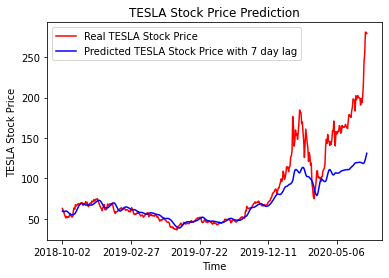

In [81]:
plt.plot(df.loc[814:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_8, color = 'blue', label = 'Predicted TESLA Stock Price with 7 day lag')
plt.xticks(np.arange(0,445,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **compare different time lag**

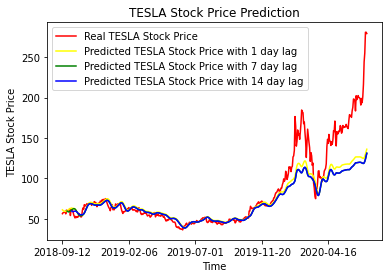

In [123]:

plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'yellow', label = 'Predicted TESLA Stock Price with 1 day lag')
plt.plot(df.loc[807:, 'Date'],predicted_stock_price_7, color = 'green', label = 'Predicted TESLA Stock Price with 7 day lag')
plt.plot(df.loc[814:, 'Date'],predicted_stock_price_8, color = 'blue', label = 'Predicted TESLA Stock Price with 14 day lag')
plt.xticks(np.arange(0,445,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **compare different hidden layer**

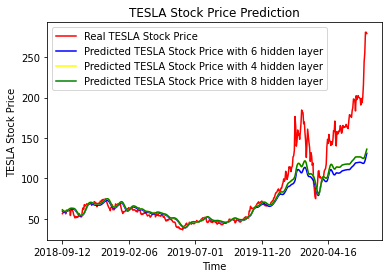

In [101]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_3, color = 'blue', label = 'Predicted TESLA Stock Price with 6 hidden layer')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'yellow', label = 'Predicted TESLA Stock Price with 4 hidden layer')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_2, color = 'green', label = 'Predicted TESLA Stock Price with 8 hidden layer')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **compare different drop out rate**

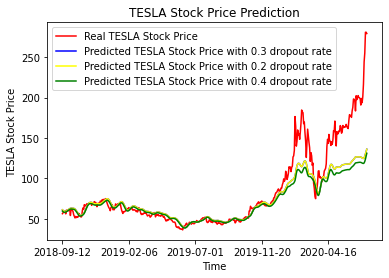

In [108]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_4, color = 'blue', label = 'Predicted TESLA Stock Price with 0.3 dropout rate')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'yellow', label = 'Predicted TESLA Stock Price with 0.2 dropout rate')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_5, color = 'green', label = 'Predicted TESLA Stock Price with 0.4 dropout rate')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# **change optimizers**

In [ ]:
predicted_stock_price-predicted_stock_price_6

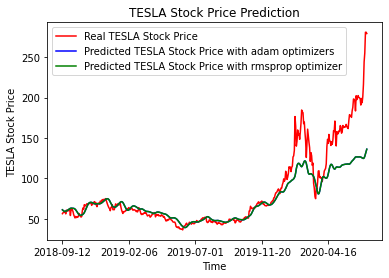

In [119]:
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with adam optimizers')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_6, color = 'green', label = 'Predicted TESLA Stock Price with rmsprop optimizer')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

预测 Predict

In [124]:
len(dataset_test)

459

In [126]:
type(dataset_test)

pandas.core.frame.DataFrame

In [27]:
testset=dataset_test.values
trainset=sc.fit_transform(testset)
print(len(trainset))
for item in range(6):
  output=[]
  for i in range(14):
    output.append(trainset[len(trainset)-60-14+i:len(trainset)-14+i])
    # print('trainset----',trainset[len(trainset)-60+i:len(trainset)+i].shape)
    # print('len---output',len(output))
  output = np.array(output)
  # print(output.shape)
  output = np.reshape(output,(output.shape[0],output.shape[1],1))
  # print(output.shape)
  predict = model.predict(output)
  trainset = np.append(trainset,predict)

pridiction = sc.inverse_transform(trainset[-84:].reshape(84,1).tolist())
  



459


In [39]:
# import datetime
# for i in range(84):
# tday = datetime.datetime(2020, 7, 10, 9, 23, 27, 857869)
# tdaystr = tday.strftime('%Y-%m-%d')
# df_new = pd.DataFrame(columns=df.columns)
# df_new.index.name == df.index.name
# df_new = df_new.append(pd.Series(name = tdaystr))
df.loc[800:, 'Date'].shape
old_day = range(445)
new_day = range(445,529)
old_day = np.array(old_day)
new_day = np.array(new_day)

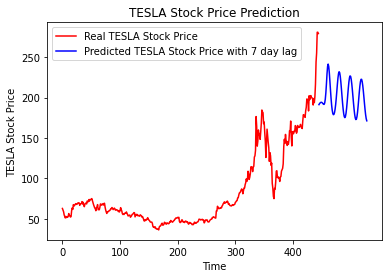

In [40]:
plt.plot(old_day,dataset_test.values, color =  'red', label = 'Real TESLA Stock Price')
plt.plot(new_day,pridiction, color = 'blue', label = 'Predicted TESLA Stock Price with 7 day lag')
plt.xticks(np.arange(0,445,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()